# Import Data

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_excel('/Users/MacBook/Desktop/data_scientist_case_study.xlsx', index_col=None)
data = data.replace(['low rise'],'low-rise')
data

,subscription_level,sign_up_date,building_type,vacancy_level,city_id,has_online_tour,photo_quality,lead_volume
0,Level4,2016-07-24,low-rise,LOW,175,NaN,low,medium
1,Level9,2018-12-23,low-rise,LOW,193,NaN,high,medium
2,Level1,2016-12-02,low-rise,LOW,155,NaN,high,medium
3,Level4,2017-09-03,low-rise,LOW,155,NaN,low,medium
4,Level2,2016-07-29,low-rise,LOW,165,NaN,high,high
...,...,...,...,...,...,...,...,...
3495,Level4,2018-09-04,mid-rise,LOW,199,NaN,high,high
3496,Level10,2016-10-03,mid-rise,LOW,195,NaN,high,medium
3497,Level1,2017-08-04,mid-rise,LOW,165,NaN,high,medium
3498,Level3,2016-12-04,mid-rise,LOW,160,NaN,high,medium


# Column Meanings
<ul>
<li>subscription_level: the subscription level the apartment building has signed up for. Higher levels
provide better listing visibility and exposure. For example, Level5 provides more visibility than
Level2 and so on.</li>
<li>sign_up_date: the date the apartment building signed up to advertise its property on XYZ
Market.</li>
<li>building_type: the type of the building based on size and number of stories.</li>
<li>vacancy_level: a categorized measure of the vacancy of apartment building. Ideally, apartment
building manageres would like to maintain a low vacancy level.</li>
<li>city_id: the id of the city the apartment building is located.</li>
<li>has_online_tour: whether the apartment provides online tour or not </li>
<li>photo_quality: the overall quality of photos the apartment has on its XYZ market listing</li>
<li>lead_volume: a categorized measure of the amount of interested renters</li>

# Subscription Level vs. Vacancy Level
<ul>
<li>Want to see if there is a correlation between a higher subscription level and lower vacancy level</li>
<li> Theory: Level 10 should have minimum LOW frequency percentage, Level 1 should have maximum HIGH frequency percentage </li>

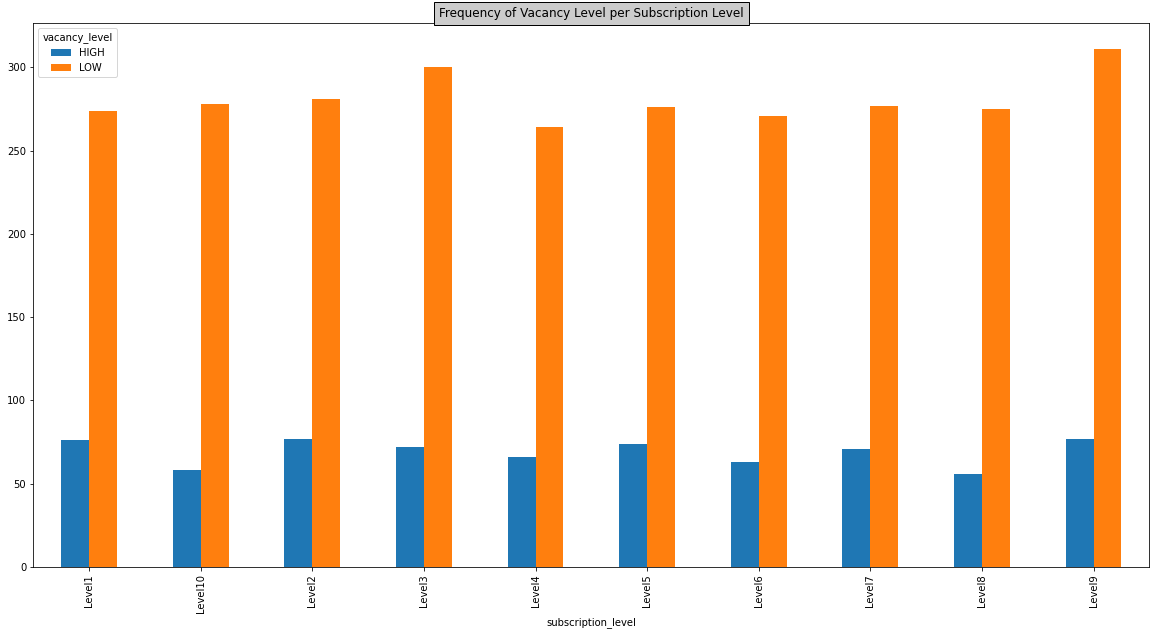

In [315]:
df=data.groupby(['subscription_level','vacancy_level']).size()
df=df.unstack()
df.plot(kind='bar', figsize=(20,10))
plt.title("Frequency of Vacancy Level per Subscription Level", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Subscription Level vs. Lead Volume
<ul>
<li>Want to see if there is a correlation between a higher subscription level and higher lead volume</li>
<li>Theory: Level 10 should have higher lead volume, Level 1 should have lower lead volume</li>
 </ul>   

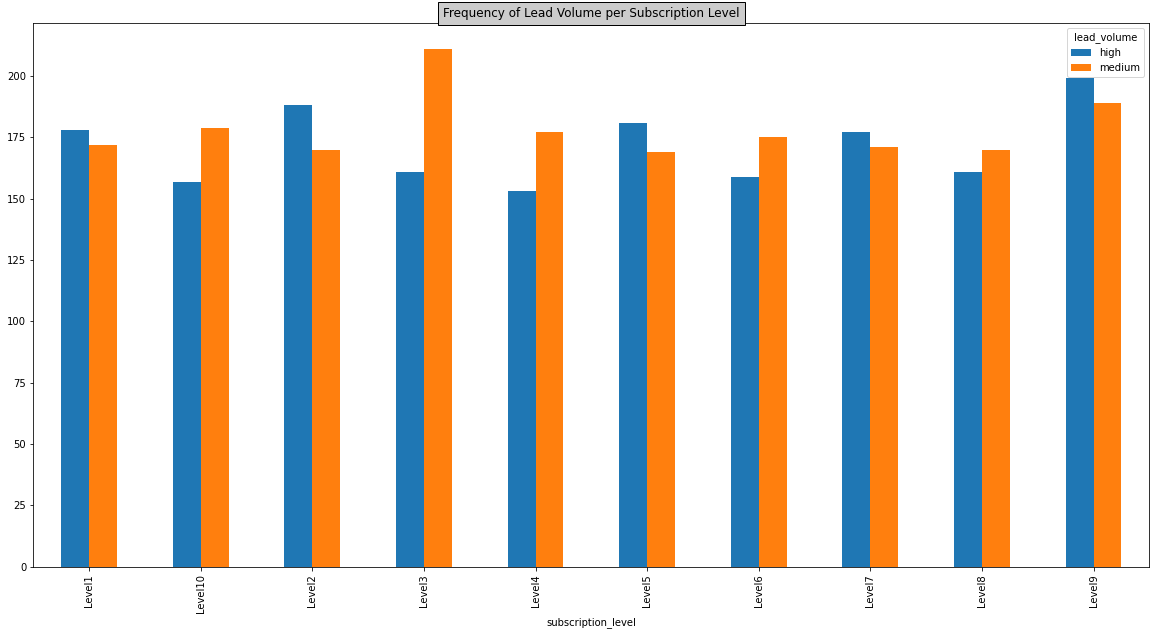

In [317]:
df=data.groupby(['subscription_level','lead_volume']).size()
df=df.unstack()
df.plot(kind='bar', figsize=(20,10))
plt.title("Frequency of Lead Volume per Subscription Level", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Building Type per City
<ul>
    <li>Should give insight as to what buildings are popular/in demand per city</li>

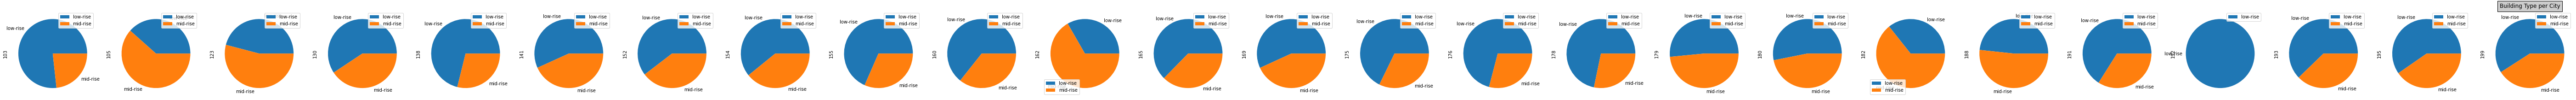

In [318]:
grouped = data.groupby('city_id')['building_type'].value_counts().unstack().fillna(0)
grouped = grouped.reset_index().set_index('city_id')
grouped.T.plot.pie(subplots=True, figsize=(100, 500))
plt.title("Building Type per City", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Online Tour Availibility & Photo Quality Impacts on Vacancy Level
<ul>
    <li>Theory: Online Tour availiability and high photo quality should leader to lower vacancy</li>
    <li>Suggestion: Complete online tour availaibility for all rows in database (whether it is yes or no)</li>
    <li>Analysis: availibility of online tour does not seem to have a strong impact on vacancy level (data could be skewed due to null values)</li>
    <li>Analysis: Photo quality does not seem to have a strong impact per vacancy level</li>
        

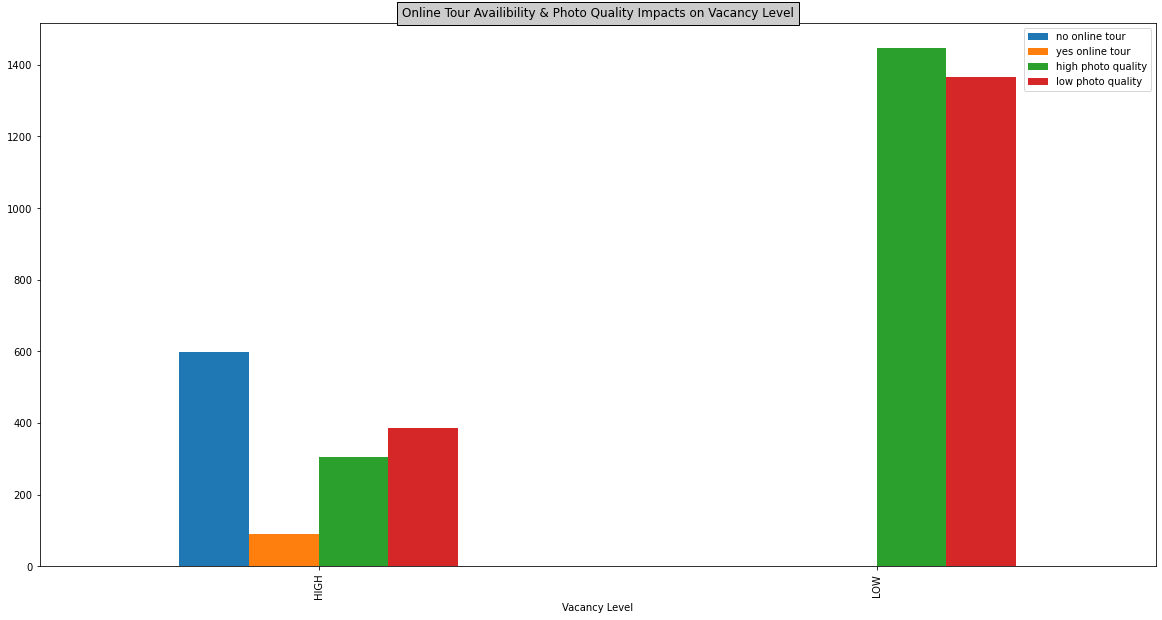

In [319]:
tour = data.groupby('vacancy_level')['has_online_tour'].value_counts().unstack().fillna(0)
tour.reset_index().set_index('vacancy_level')
photo = data.groupby('vacancy_level')['photo_quality'].value_counts().unstack().fillna(0)
photo.reset_index().set_index('vacancy_level')
merge = pd.concat([tour, photo], axis=1)
ax = merge.plot(kind='bar', figsize=(20,10))
ax.legend(["no online tour", "yes online tour", "high photo quality", 'low photo quality']);
plt.xlabel("Vacancy Level")
plt.title("Online Tour Availibility & Photo Quality Impacts on Vacancy Level", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Online Tour Availibility & Photo Quality Impacts on Lead Volume
<ul>
    <li>Theory: Online Tour availibility and high photo quality should leader to higher lead volume</li>
    <li>Analysis: photo quality did not seem to have as much impact on lead volume as online tour does</li>

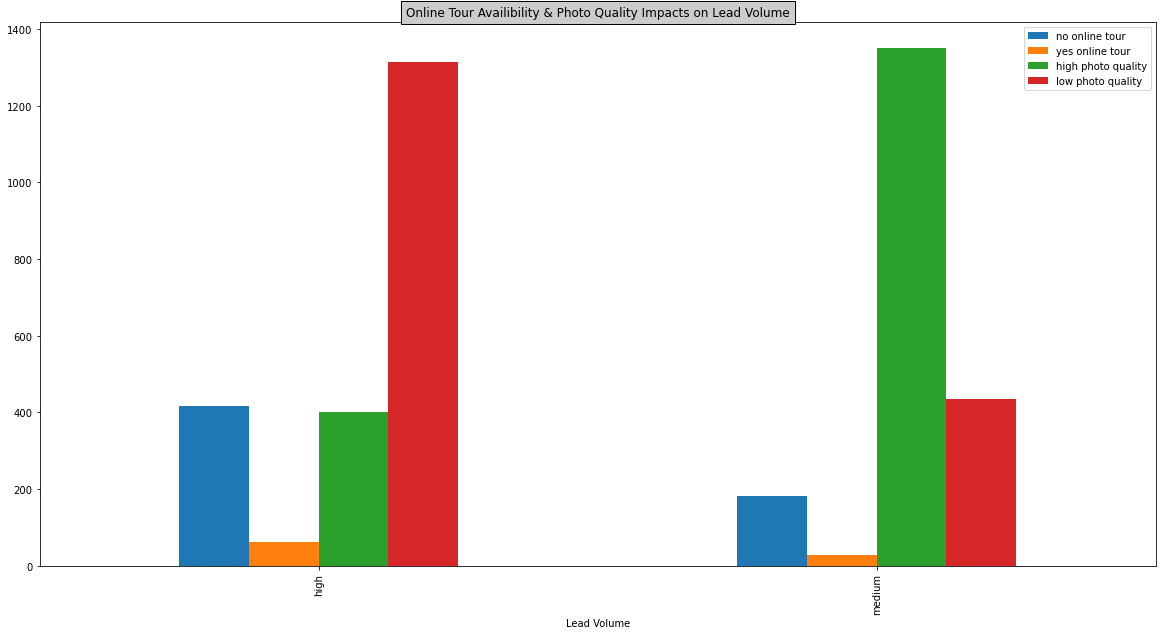

In [320]:
tour2 = data.groupby('lead_volume')['has_online_tour'].value_counts().unstack().fillna(0)
tour2.reset_index().set_index('lead_volume')
photo2 = data.groupby('lead_volume')['photo_quality'].value_counts().unstack().fillna(0)
photo2.reset_index().set_index('lead_volume')
merge2 = pd.concat([tour2, photo2], axis=1)
ax = merge2.plot(kind='bar', figsize=(20,10))
ax.legend(["no online tour", "yes online tour", "high photo quality", 'low photo quality']);
plt.xlabel("Lead Volume")
plt.title("Online Tour Availibility & Photo Quality Impacts on Lead Volume", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Sign Up Date vs. Vacancy Level According to Subscription Level
<ul>
<li> Theory: High subscription levels should be seen in later sign up dates (growing business = more competition)</li>
<li> Theory: High subscription levels should be seen more at low end of vacancy_level spectrum</li>
<li> Analysis: as time has gone on, more listings have been posted (indicating a growing business) and more buildings have been paying for higher subscription level </li>

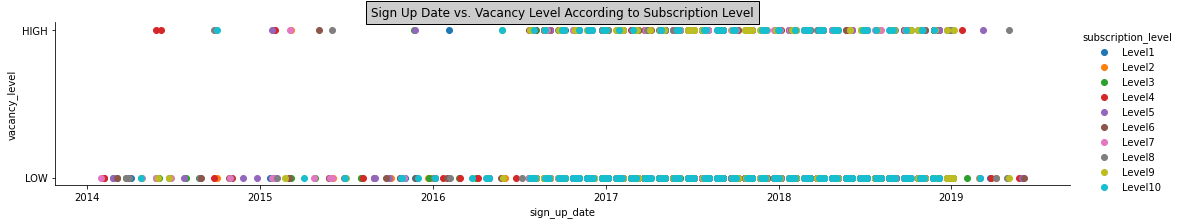

In [321]:
timeline = data
timeline['sign_up_date'] =  pd.to_datetime(timeline['sign_up_date'])
# data.sort_values(by='sign_up_date')
timeline['vacancy_level']=timeline.vacancy_level.astype(object)
replace_all_these = {'HIGH' : 1, 'LOW' : 0}
timeline['vacancy_level'] = timeline['vacancy_level'].replace(replace_all_these)
new = timeline.iloc[:, [0,1,3]]

levels= ['Level1', 'Level2', 'Level3', 'Level4', 'Level5', 'Level6', 'Level7', 'Level8', 'Level9', 'Level10']
fg = sns.FacetGrid(data=new, hue='subscription_level', hue_order=levels, aspect=5)
fg.map(plt.scatter, 'sign_up_date', 'vacancy_level').add_legend()
plt.yticks(np.arange(0,2,1),('LOW', 'HIGH'))
plt.title("Sign Up Date vs. Vacancy Level According to Subscription Level", bbox={'facecolor':'0.8', 'pad':5})
plt.show()